In [2]:
!pip install theano

^C


In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.random.seed(123)
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils



Using TensorFlow backend.


In [10]:
batch__size=128
nb_classes= 10  #10 digits from 0 to 9

img_rows, img_cols=28,28

(X_train, y_train), (X_test, y_test)= mnist.load_data()

X_train= X_train.reshape(-1,img_rows, img_cols, 1)
X_test= X_test.reshape(-1,img_rows, img_cols, 1)
X_train=X_train.astype("float32")
X_test= X_test.astype("float32")
X_train/=255
X_test/=255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train= np_utils.to_categorical(y_train, nb_classes)
Y_test= np_utils.to_categorical(y_test, nb_classes)
print("one hot encoding: {}".format(Y_train[0, :]))




X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
one hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


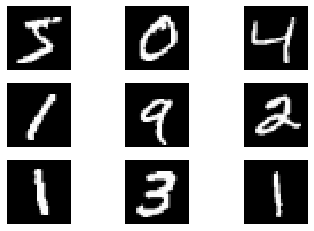

In [18]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.axis("off")

In [20]:
model= Sequential()

model.add(Conv2D(6, 5, 5, input_shape=(img_rows, img_cols, 1), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))





In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [22]:
nb_epoch=2

model.fit(X_train, Y_train,batch_size=batch__size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score= model.evaluate(X_test, Y_test, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 59s 981us/step - loss: 0.3305 - val_loss: 0.0702
Epoch 2/2
60000/60000 [==============================] - 56s 930us/step - loss: 0.1040 - val_loss: 0.0472


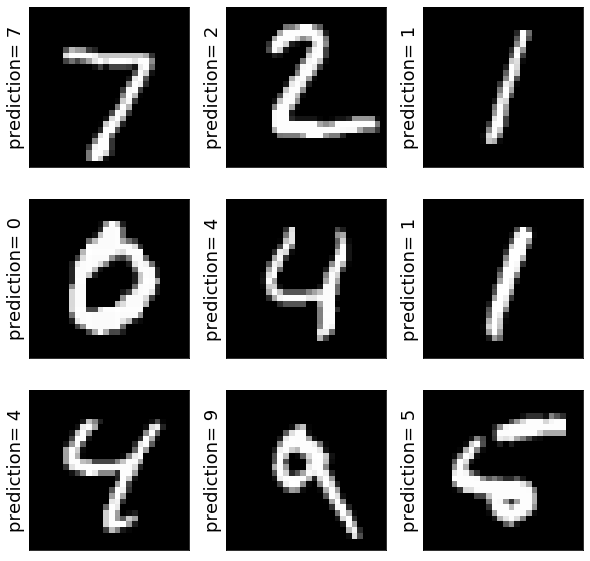

In [24]:
res= model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction= %d" % res[i], fontsize=18)
    